<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup
import requests

Download the webpage at the url


In [3]:
#your code goes here
res = requests.get(url)

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(res.content,'lxml')

Scrape the `Language name` and `annual average salary`.


In [5]:
rows = soup.find_all('tr')
rows[0]

<tr>
<td>No.</td>
<td>Language</td>
<td>Created By</td>
<td>Average Annual Salary</td>
<td>Learning Difficulty</td>
</tr>

In [6]:
#your code goes here
name = []
salary = []
for row in rows[1:]:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    name.append(cols[1])
    salary.append(cols[3])

Save the scrapped data into a file named *popular-languages.csv*


In [13]:
# your code goes here
import pandas as pd
df = pd.DataFrame({'name':name,'salary':salary})
df

,name,salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"
5,C++,"$113,865"
6,C#,"$88,726"
7,PHP,"$84,727"
8,SQL,"$84,793"
9,Go,"$94,082"


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df['salary'] = df['salary'].str.replace('$','')
df['salary'] = df['salary'].str.replace(',','')
df['salary'] = df['salary'].astype(float)
df.sort_values(by='salary',ascending=False,inplace=True)
df.head()

/tmp/ipykernel_46762/3705077957.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['salary'] = df['salary'].str.replace('$','')


,name,salary
4,Swift,130801.0
0,Python,114383.0
5,C++,113865.0
3,Javascript,110981.0
1,Java,101013.0


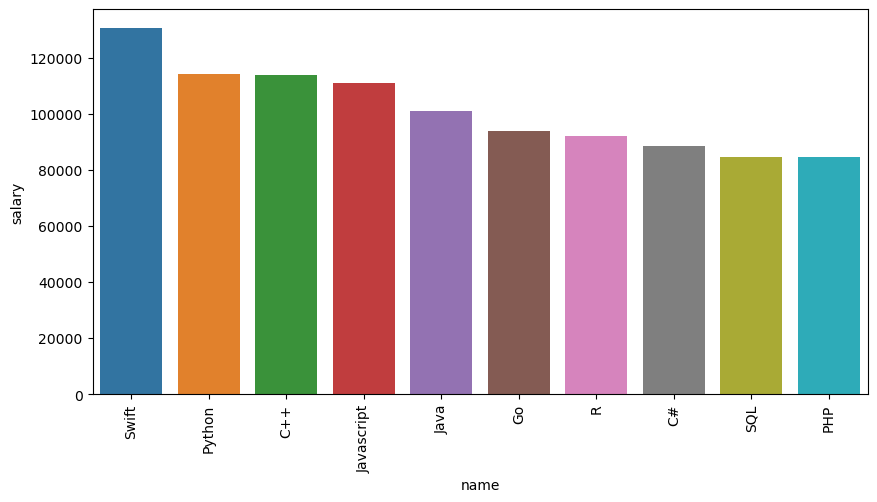

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x='name',y='salary',data=df)
plt.xticks(rotation=90);

In [11]:
soup.find_all("img")

[]

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
